# Lets load required libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import datetime
%matplotlib inline

# Preprocessing the data

In [2]:
df=pd.read_excel("E://GIthub clone//Github-clone//Wells Fargo Challenge//Wells Fargo Trainset.xlsx")

In [3]:
df.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [4]:
df.describe()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,275.377747,10233.110609,53.937214,6.666714,611.061571,74007.681071
std,317.892333,29967.453812,18.829836,9.059419,668.113489,24948.053588
min,0.010000,0.000000,13.000000,0.000000,-117.000000,0.000000
25%,11.322500,0.000000,39.000000,3.000000,75.000000,63123.000000
50%,161.355000,2410.395000,59.000000,5.000000,365.500000,85037.000000
75%,488.822500,4732.695000,68.000000,7.000000,961.000000,92201.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000


In [5]:
df.info() #To see the variables data type and non-null amount.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 24 columns):
TRAN_AMT                   14000 non-null float64
ACCT_PRE_TRAN_AVAIL_BAL    14000 non-null float64
CUST_AGE                   14000 non-null int64
OPEN_ACCT_CT               14000 non-null int64
WF_dvc_age                 14000 non-null int64
PWD_UPDT_TS                10875 non-null object
CARR_NAME                  11291 non-null object
RGN_NAME                   11291 non-null object
STATE_PRVNC_TXT            11291 non-null object
ALERT_TRGR_CD              14000 non-null object
DVC_TYPE_TXT               12239 non-null object
AUTHC_PRIM_TYPE_CD         14000 non-null object
AUTHC_SCNDRY_STAT_TXT      13926 non-null object
CUST_ZIP                   14000 non-null int64
CUST_STATE                 13964 non-null object
PH_NUM_UPDT_TS             6939 non-null object
CUST_SINCE_DT              14000 non-null datetime64[ns]
TRAN_TS                    14000 non-null object
TRAN

In [6]:
df.columns

Index(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'PWD_UPDT_TS', 'CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT',
       'ALERT_TRGR_CD', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD',
       'AUTHC_SCNDRY_STAT_TXT', 'CUST_ZIP', 'CUST_STATE', 'PH_NUM_UPDT_TS',
       'CUST_SINCE_DT', 'TRAN_TS', 'TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT', 'FRAUD_NONFRAUD'],
      dtype='object')

## Drop the columns with missing data

#### I drop the coulmn with identical value and unsignificant cloumns with date

In [7]:
df_raw=df[['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE','OPEN_ACCT_CT','WF_dvc_age','ALERT_TRGR_CD','AUTHC_PRIM_TYPE_CD','CUST_ZIP','CUST_SINCE_DT','FRAUD_NONFRAUD']]

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 10 columns):
TRAN_AMT                   14000 non-null float64
ACCT_PRE_TRAN_AVAIL_BAL    14000 non-null float64
CUST_AGE                   14000 non-null int64
OPEN_ACCT_CT               14000 non-null int64
WF_dvc_age                 14000 non-null int64
ALERT_TRGR_CD              14000 non-null object
AUTHC_PRIM_TYPE_CD         14000 non-null object
CUST_ZIP                   14000 non-null int64
CUST_SINCE_DT              14000 non-null datetime64[ns]
FRAUD_NONFRAUD             14000 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [9]:
df_raw.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,ALERT_TRGR_CD,AUTHC_PRIM_TYPE_CD,CUST_ZIP,CUST_SINCE_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,MOBL,UN_PWD,89002,1993-01-06,Non-Fraud
1,65.19,0.00,45,5,2721,MOBL,FACE_ID,94541,1971-01-07,Non-Fraud
2,54.84,34570.63,36,8,1531,ONLN,UN_PWD,21811,1994-02-01,Fraud
3,0.01,0.00,62,3,835,MOBL,UN_PWD,89822,2001-11-01,Non-Fraud
4,497.08,12725.18,81,2,1095,MOBL,UN_PWD,84108,1987-02-07,Fraud


#### Convert text value to numerical value

In [10]:
df_raw[["ALERT_TRGR_CD","AUTHC_PRIM_TYPE_CD","FRAUD_NONFRAUD"]]=df_raw[["ALERT_TRGR_CD","AUTHC_PRIM_TYPE_CD","FRAUD_NONFRAUD"]].apply(lambda col: pd.factorize(col, sort =True)[0]) #Convert text value to numerical value

E:\python\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
df_raw.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,ALERT_TRGR_CD,AUTHC_PRIM_TYPE_CD,CUST_ZIP,CUST_SINCE_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,0,4,89002,1993-01-06,1
1,65.19,0.00,45,5,2721,0,2,94541,1971-01-07,1
2,54.84,34570.63,36,8,1531,1,4,21811,1994-02-01,0
3,0.01,0.00,62,3,835,0,4,89822,2001-11-01,1
4,497.08,12725.18,81,2,1095,0,4,84108,1987-02-07,0


#### Convert timestamp to days

In [12]:
df_raw['CUST_SINCE_DT']=(df_raw['CUST_SINCE_DT']-datetime.datetime.today()).dt.days

E:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Convert the Pandas data frame to a Numpy array

In [13]:
X=df_raw[['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE','OPEN_ACCT_CT','WF_dvc_age','ALERT_TRGR_CD','AUTHC_PRIM_TYPE_CD','CUST_ZIP','CUST_SINCE_DT']].values.astype(float)
X

array([[ 5.380000e+00,  2.361991e+04,  4.700000e+01, ...,  4.000000e+00,
         8.900200e+04, -1.050900e+04],
       [ 6.519000e+01,  0.000000e+00,  4.500000e+01, ...,  2.000000e+00,
         9.454100e+04, -1.854400e+04],
       [ 5.484000e+01,  3.457063e+04,  3.600000e+01, ...,  4.000000e+00,
         2.181100e+04, -1.011800e+04],
       ...,
       [ 4.930000e+02,  2.848630e+03,  5.400000e+01, ...,  4.000000e+00,
         3.357900e+04, -1.350200e+04],
       [ 4.916400e+02,  3.163250e+03,  2.100000e+01, ...,  4.000000e+00,
         9.170200e+04, -2.280000e+02],
       [ 6.020000e+00,  0.000000e+00,  6.000000e+01, ...,  4.000000e+00,
         7.407000e+03, -3.201000e+03]])

#### Normalize Data

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y=df_raw['FRAUD_NONFRAUD']
X[0:5]

array([[-0.84936742,  0.44672723, -0.36842923, -0.29436872,  3.24198781,
        -0.98440727,  0.53229885,  0.60104306, -0.4153102 ],
       [-0.66121524, -0.34148634, -0.47464743, -0.18398242,  3.15816672,
        -0.98440727, -1.55895523,  0.82307232, -2.01003273],
       [-0.69377459,  0.81216071, -0.95262935,  0.14717648,  1.37696858,
         1.01583972,  0.53229885, -2.09228929, -0.33770765],
       [-0.86626054, -0.34148634,  0.42820731, -0.40475502,  0.33519219,
        -0.98440727,  0.53229885,  0.63391253,  0.22396811],
       [ 0.69743793,  0.08316217,  1.43728026, -0.51514132,  0.72436154,
        -0.98440727,  0.53229885,  0.40486845, -0.84400972]])

# Classification

## K nearest neighbor

#### Import library

In [15]:
from sklearn.neighbors import KNeighborsClassifier

#### Split training data into trian_train and train_test

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_train.shape,  y_train_train.shape)
print ('Test set:',X_train_test.shape,  y_train_test.shape)

Train set: (11200, 9) (11200,)
Test set: (2800, 9) (2800,)


#### Training

In [18]:
k=1 #Assume the k equals 4 first
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_train,y_train_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Prediction

In [19]:
yhat = neigh.predict(X)
yhat[:5]

array([1, 1, 0, 1, 1], dtype=int64)

#### Claculate F1 score

In [20]:
from sklearn.metrics import f1_score

In [21]:
f1_score(y, yhat) # This is a binary clasiffication

0.9684767134431563

#### Evaluation: Find out the best k

In [22]:
F1_scores=[]
for Ks in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors = Ks).fit(X,y)
    yhats = neigh.predict(X)
    F1_scores.append(f1_score(y, yhats))
F1_scores

[1.0,
 0.914588391083646,
 0.917135961383749,
 0.9004151558148089,
 0.9037029583417185,
 0.892024156601416,
 0.8976767676767677,
 0.8900290215588723,
 0.8919370349749456,
 0.8852628317670144,
 0.8890579820423072,
 0.8841605123173062,
 0.8847930946940848,
 0.8815444015444015]

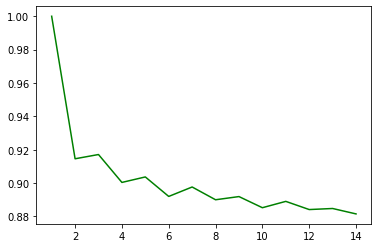

In [23]:
plt.plot(range(1,15),F1_scores,'g')

In [24]:
F1_scores=[]
for Ks in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = Ks).fit(X_train_train,y_train_train)
    yhats = neigh.predict(X_train_test)
    F1_scores.append(f1_score(y_train_test, yhats))


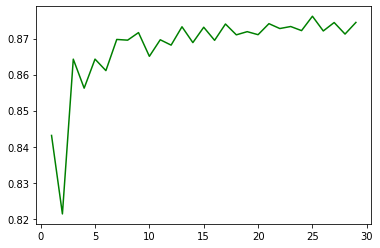

In [25]:
plt.plot(range(1,30),F1_scores,'g')

## Decision Tree

In [26]:
X_train_train

array([[-0.86626054, -0.33834482,  0.37509821, ...,  0.53229885,
         0.12363406,  1.28698414],
       [ 0.57157321, -0.29282348, -0.42153833, ...,  0.53229885,
         0.13798439,  0.18725079],
       [-0.79994641, -0.30848069,  0.90618924, ...,  0.53229885,
         0.97515374, -1.48586817],
       ...,
       [-0.86626054, -0.34148634,  0.74686193, ...,  0.53229885,
         0.74149992,  0.28132652],
       [ 0.66623128,  1.35880926,  0.64064372, ...,  0.53229885,
         0.46247019,  0.27179986],
       [-0.70937792, -0.04993564, -0.89952025, ...,  0.53229885,
         0.80575572,  0.2757693 ]])

In [27]:
y_train_train[:5]

6871     1
10896    1
12783    1
1472     0
7907     1
Name: FRAUD_NONFRAUD, dtype: int64

#### Training

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
drugTree.fit(X_train_train,y_train_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Prediction

In [31]:
pretree=drugTree.predict(X_train_test)

In [32]:
pretree

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt


In [34]:
metrics.accuracy_score(y_train_test, pretree)

0.9353571428571429

In [35]:
test=pd.read_excel("E://GIthub clone//Github-clone//Wells Fargo Challenge//Wells Fargo Testset.xlsx")

In [36]:
X_test=test[['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE','OPEN_ACCT_CT','WF_dvc_age','ALERT_TRGR_CD','AUTHC_PRIM_TYPE_CD','CUST_ZIP','CUST_SINCE_DT']]

In [37]:
X_test.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,ALERT_TRGR_CD,AUTHC_PRIM_TYPE_CD,CUST_ZIP,CUST_SINCE_DT
0,54.25,0.0,23,4,634,MOBL,UN_PWD,55414,2011-02-19
1,110.30,0.0,56,3,1876,ONLN,UN_PWD,77095,2001-11-20
2,515.95,0.0,33,5,40,MOBL,UN_PWD,94102,1999-10-17
3,42.78,0.0,60,3,367,MOBL,UN_PWD,93263,1998-07-03
4,0.01,0.0,61,12,518,MOBL,UN_PWD,93313,2002-07-30


In [38]:
X_test[["ALERT_TRGR_CD","AUTHC_PRIM_TYPE_CD"]]=X_test[["ALERT_TRGR_CD","AUTHC_PRIM_TYPE_CD"]].apply(lambda col: pd.factorize(col, sort =True)[0]) #Convert text value to numerical value

E:\python\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [39]:
X_test['CUST_SINCE_DT']=(X_test['CUST_SINCE_DT']-datetime.datetime.today()).dt.days

E:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
y_test_TREE=drugTree.predict(X_test)
y_test_TREE

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
y_test_KNN=neigh.predict(X_test)
y_test_KNN

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
test["Fraud_NoFraud_TREE"]=y_test_TREE

In [43]:
test["Fraud_NoFraud_KNN"]=y_test_KNN

In [44]:
test[test["Fraud_NoFraud_TREE"]==0]

,dataset_id,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,...,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,Fraud_NoFraud_TREE,Fraud_NoFraud_KNN
2673,2674,0.70,0.00,32,2,1571,5/25/2020 18:6:2,frontier communications of america inc.,southwest,california,...,NaN,2001-10-01,3/30/2021 9:6:2,3/30/2021,SCHPMT,P2P_COMMIT,P2P,3/30/2021,0,1
2875,2876,492.08,3923.89,85,0,-9,7/21/2020 18:44:21,NaN,NaN,NaN,...,NaN,1992-02-16,4/18/2021 13:44:21,4/18/2021,SCHPMT,P2P_COMMIT,P2P,4/18/2021,0,1
3923,3924,0.68,2455.85,71,11,1492,7/8/2020 4:20:50,comcast cable communications llc,southwest,california,...,NaN,1996-10-20,5/30/2021 8:20:50,5/30/2021,SCHPMT,P2P_COMMIT,P2P,5/30/2021,0,1


In [47]:
test[test["Fraud_NoFraud_KNN"]==test["Fraud_NoFraud_TREE"]].shape

(5857, 26)

In [48]:
test[test["Fraud_NoFraud_KNN"]!=test["Fraud_NoFraud_TREE"]].shape

(143, 26)

In [50]:
143/5857

0.02441522963974731